In [103]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

In [104]:
# read dataset
df = pd.read_csv("Downloads\Sea-Level-Predictor-main\Sea-Level-Predictor-main\epa-sea-level.csv")

In [105]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [107]:
# split dataset into independent and dependent variable
x = df.iloc[:, :1].values
y = df.iloc[:, 1].values
x

array([[1880],
       [1881],
       [1882],
       [1883],
       [1884],
       [1885],
       [1886],
       [1887],
       [1888],
       [1889],
       [1890],
       [1891],
       [1892],
       [1893],
       [1894],
       [1895],
       [1896],
       [1897],
       [1898],
       [1899],
       [1900],
       [1901],
       [1902],
       [1903],
       [1904],
       [1905],
       [1906],
       [1907],
       [1908],
       [1909],
       [1910],
       [1911],
       [1912],
       [1913],
       [1914],
       [1915],
       [1916],
       [1917],
       [1918],
       [1919],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1930],
       [1931],
       [1932],
       [1933],
       [1934],
       [1935],
       [1936],
       [1937],
       [1938],
       [1939],
       [1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [19

In [108]:
y

array([ 0.        ,  0.22047244, -0.44094488, -0.23228346,  0.59055118,
        0.53149606,  0.43700787,  0.21653543,  0.2992126 ,  0.36220472,
        0.44094488,  0.37401575,  0.5       ,  0.68503937,  0.30314961,
        0.76771654,  0.46850394,  0.67322835,  1.04330709,  1.33858268,
        1.12598425,  1.11023622,  1.29133858,  1.60629921,  1.2007874 ,
        0.98425197,  1.2519685 ,  1.19685039,  1.0984252 ,  1.27559055,
        1.27165354,  1.59842519,  1.47637795,  1.54724409,  1.79527559,
        2.10629921,  2.03149606,  1.85433071,  1.79133858,  1.85433071,
        1.90551181,  1.98818897,  1.9527559 ,  2.        ,  1.71259842,
        1.79133858,  2.04724409,  2.00393701,  1.8503937 ,  1.90551181,
        2.06299212,  2.04724409,  2.27165354,  2.44094488,  2.22834645,
        2.4488189 ,  2.29527559,  2.51968504,  2.62204724,  2.82677165,
        2.61811023,  3.09842519,  3.09842519,  3.09842519,  2.84645669,
        2.95669291,  3.2519685 ,  3.37401574,  3.56299212,  3.51

In [117]:
def draw_plot():

    # Create a scatter plot
    x = df['Year']
    y = df['CSIRO Adjusted Sea Level']

    fig, ax = plt.subplots()
    plt.scatter(x, y)

    # Create first line of best fit
    regress = linregress(x, y)
    x_predict = pd.Series([i for i in range(1880, 2051)])
    y_predict = regress.slope * x_predict + regress.intercept

    plt.plot(x_predict, y_predict, 'blue')  # plot best fit

    # Create second line of best fit
    df1 = df.loc[df['Year'] >= 2000]
    x2 = df1['Year']
    y2 = df1['CSIRO Adjusted Sea Level']

    regress2 = linregress(x2, y2)
    x2_predict = pd.Series([i for i in range(2000, 2051)])
    y2_predict = regress2.slope * x2_predict + regress2.intercept
    
    plt.plot(x2_predict, y2_predict, 'red')  # plot best fit

    ax.set_xlabel('Year')
    ax.set_ylabel("Sea Level (inches)")
    ax.set_title('Rise in Sea Level')
    
    # Save plot and return
    plt.savefig('sea_level_plot.png')
    return plt.gca()

<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

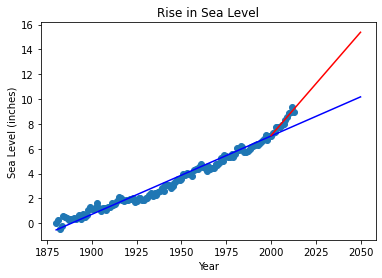

In [118]:
# call the created function 
draw_plot()